In [1]:
import pandas as pd
data=pd.read_csv("purchases.txt",header = None, sep = '\t')
data.columns=['customer_id', 'purchase_amount', 'date_of_purchase']

In [2]:
data.head()

,customer_id,purchase_amount,date_of_purchase
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [3]:
from datetime import datetime
data["date_of_purchase"]=data["date_of_purchase"].apply(lambda x:datetime.strptime(x, "%Y-%m-%d"))

In [4]:
snapshot_date=datetime.strptime("2016-01-01", "%Y-%m-%d")
data["days_since"]=data["date_of_purchase"].apply(lambda x:(snapshot_date-x).days)
import numpy as np
datamart = data.groupby(['customer_id']).agg({
'days_since': ['min','max'],'customer_id': 'count',
'purchase_amount': 'mean'})
datamart.columns=["recency",'first_purchase','frequency','amount']
datamart["amount"]=datamart["amount"].apply(lambda x:round(x,2))
datamart.head()
customers_2015=datamart
customers_2015["segment"] = "NA"
customers_2015.segment[customers_2015.recency > 365*3] = "inactive"
customers_2015.segment[(customers_2015.recency <= 365*3) & (customers_2015.recency > 365*2)] = "cold"
customers_2015.segment[(customers_2015.recency <= 365*2) & (customers_2015.recency > 365*1)] = "warm"
customers_2015.segment[customers_2015.recency <= 365] = "active"
customers_2015.segment[(customers_2015.segment == "warm") & (customers_2015.first_purchase <= 365*2)] = "new warm"
customers_2015.segment[(customers_2015.segment == "warm") & (customers_2015.amount < 100)] = "warm low value"
customers_2015.segment[(customers_2015.segment == "warm") & (customers_2015.amount >= 100)] = "warm high value"
customers_2015.segment[(customers_2015.segment == "active") & (customers_2015.first_purchase <= 365)] = "new active"
customers_2015.segment[(customers_2015.segment == "active") & (customers_2015.amount < 100)] = "active low value"
customers_2015.segment[(customers_2015.segment == "active") & (customers_2015.amount >= 100)] = "active high value"
customers_2015.head()

C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.

,recency,first_purchase,frequency,amount,segment
customer_id,,,,,
10,3829,3829,1,30.00,inactive
80,343,3751,7,71.43,active low value
90,758,3783,10,115.80,cold
120,1401,1401,1,20.00,inactive
130,2970,3710,2,50.00,inactive


In [10]:
newdata=data[data["days_since"]>365]
datamart = newdata.groupby(['customer_id']).agg({
'days_since': ['min','max'],'customer_id': 'count',
'purchase_amount': 'mean'})
datamart.columns=["recency",'first_purchase','frequency','amount']
datamart["amount"]=datamart["amount"].apply(lambda x:round(x,2))
datamart["recency"]=datamart["recency"]-365
datamart["first_purchase"]=datamart["first_purchase"]-365
#We want to compute that as if we were a year ago,so we are going to remove 365 of that figure.

customers_2014=datamart
customers_2014.head()

,recency,first_purchase,frequency,amount
customer_id,,,,
10,3464,3464,1,30.0
80,302,3386,6,70.0
90,393,3418,10,115.8
120,1036,1036,1,20.0
130,2605,3345,2,50.0


In [11]:
customers_2014["segment"] = "NA"
customers_2014.segment[customers_2014.recency > 365*3] = "inactive"
customers_2014.segment[(customers_2014.recency <= 365*3) & (customers_2014.recency > 365*2)] = "cold"
customers_2014.segment[(customers_2014.recency <= 365*2) & (customers_2014.recency > 365*1)] = "warm"
customers_2014.segment[customers_2014.recency <= 365] = "active"
customers_2014.segment[(customers_2014.segment == "warm") & (customers_2014.first_purchase <= 365*2)] = "new warm"
customers_2014.segment[(customers_2014.segment == "warm") & (customers_2014.amount < 100)] = "warm low value"
customers_2014.segment[(customers_2014.segment == "warm") & (customers_2014.amount >= 100)] = "warm high value"
customers_2014.segment[(customers_2014.segment == "active") & (customers_2014.first_purchase <= 365)] = "new active"
customers_2014.segment[(customers_2014.segment == "active") & (customers_2014.amount < 100)] = "active low value"
customers_2014.segment[(customers_2014.segment == "active") & (customers_2014.amount >= 100)] = "active high value"
customers_2014.head()

C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd

,recency,first_purchase,frequency,amount,segment
customer_id,,,,,
10,3464,3464,1,30.0,inactive
80,302,3386,6,70.0,active low value
90,393,3418,10,115.8,warm high value
120,1036,1036,1,20.0,cold
130,2605,3345,2,50.0,inactive


In [12]:
new_data =pd.merge(customers_2014,customers_2015, on = "customer_id")
new_data.head()

,recency_x,first_purchase_x,frequency_x,amount_x,segment_x,recency_y,first_purchase_y,frequency_y,amount_y,segment_y
customer_id,,,,,,,,,,
10,3464,3464,1,30.0,inactive,3829,3829,1,30.00,inactive
80,302,3386,6,70.0,active low value,343,3751,7,71.43,active low value
90,393,3418,10,115.8,warm high value,758,3783,10,115.80,cold
120,1036,1036,1,20.0,cold,1401,1401,1,20.00,inactive
130,2605,3345,2,50.0,inactive,2970,3710,2,50.00,inactive


In [17]:
transition = pd.crosstab(new_data.segment_x, new_data.segment_y)
#print(transition)
transition=(transition.T / transition.T.sum()).T
reorderlist=["inactive", "cold", "warm high value", "warm low value", "new warm", "active high value", "active low value", "new active"]
transition=transition.reindex(reorderlist)
transition=transition[reorderlist[:-1]]
transition["new active"]=0
transition=transition.T
transition

segment_x,inactive,cold,warm high value,warm low value,new warm,active high value,active low value,new active
segment_y,,,,,,,,
inactive,0.962061,0.896888,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
cold,0.000000,0.000000,0.675676,0.720711,0.9112,0.000000,0.000000,0.000000
warm high value,0.000000,0.000000,0.000000,0.000000,0.0000,0.250526,0.000000,0.000000
warm low value,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.299236,0.000000
new warm,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.652749
active high value,0.004659,0.010218,0.315315,0.001046,0.0120,0.745263,0.007307,0.061935
active low value,0.033280,0.092894,0.009009,0.278243,0.0768,0.004211,0.693457,0.285317
new active,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000


In [18]:
# Initialize a matrix with the number of customers in each segment today and after 10 periods
seg = np.ones((8,11))
seg[:,0]=pd.value_counts(customers_2015["segment"])
seg=pd.DataFrame(seg)
seg.columns=list(range(2015,2026))
seg.index=pd.value_counts(customers_2015["segment"]).index
seg=seg.reindex(reorderlist)
seg

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
inactive,9158.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
cold,1903.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
warm high value,119.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
warm low value,901.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
new warm,938.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
active high value,573.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
active low value,3313.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
new active,1512.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
for i in range(1,11):
    seg.iloc[:,i]=np.dot(transition,seg.iloc[:, i-1].values)
seg[seg.columns]=seg[seg.columns].astype("int")
seg

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
inactive,9158,10517,11539,12636,12940,13185,13386,13542,13663,13759,13833
cold,1903,1584,1710,873,820,781,739,708,684,665,650
warm high value,119,143,164,159,156,152,148,145,142,140,138
warm low value,901,991,1058,989,937,883,843,813,789,770,756
new warm,938,986,0,0,0,0,0,0,0,0,0
active high value,573,656,638,624,607,593,581,570,561,553,547
active low value,3313,3536,3305,3133,2954,2820,2717,2636,2575,2527,2490
new active,1512,0,0,0,0,0,0,0,0,0,0


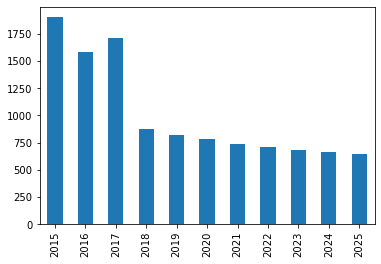

In [24]:
seg.iloc[1,:].plot.bar()

In [47]:
data["year_of_purchase"] = data["date_of_purchase"].apply(lambda x:x.year)
revenue2015=data[data["year_of_purchase"]==2015]
ans=revenue2015.groupby("customer_id")["purchase_amount"].sum()
ans

customer_id
80         80.0
480        45.0
830        50.0
850        60.0
860        60.0
          ...  
263820     10.0
263870     50.0
263880     20.0
263890     54.0
264200    500.0
Name: purchase_amount, Length: 5398, dtype: float64

In [48]:
actual = pd.merge(ans,customers_2015,on="customer_id",how="left")
actual.head()

,purchase_amount,recency,first_purchase,frequency,amount,segment
customer_id,,,,,,
80,80.0,343,3751,7,71.43,active low value
480,45.0,21,3678,12,60.83,active low value
830,50.0,321,3739,7,48.57,active low value
850,60.0,24,3416,10,28.50,active low value
860,60.0,237,4008,10,54.00,active low value


In [49]:
actual.groupby("segment")["purchase_amount"].mean()

segment
active high value    323.568935
active low value      52.306043
new active            79.166144
Name: purchase_amount, dtype: float64

In [50]:
pd.value_counts(actual["segment"])

active low value     3313
new active           1512
active high value     573
Name: segment, dtype: int64

In [65]:
yearly_revenue = [0, 0, 0, 0, 0, 323.57, 52.31, 79.17]
yearly_revenue =np.dot(seg.T,yearly_revenue)
yearly_revenue

array([478413.68, 397230.08, 379322.21, 365794.91, 350930.73, 339391.21,
       330120.44, 322324.06, 316221.02, 311121.58, 307244.69])

In [70]:
# Create a discount factor

discount_rate = 0.10
def discount_factor(x):
    return 1 / ((1 + discount_rate)**(x))
discount=[]
for i in range(11):
    discount.append(discount_factor(i))

print(discount)

[1.0, 0.9090909090909091, 0.8264462809917354, 0.7513148009015775, 0.6830134553650705, 0.6209213230591549, 0.5644739300537772, 0.5131581182307065, 0.4665073802097331, 0.42409761837248455, 0.3855432894295314]


In [71]:
# Compute discounted yearly revenue
disc_yearly_revenue = np.dot(yearly_revenue,discount)
print(round(disc_yearly_revenue))

2627943.0


In [ ]:
# What is the database worth?
print(disc_yearly_revenue[11] - yearly_revenue[1])
